# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd 

twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
import requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open("image_predictions.tsv", "wb" ) as file:
    file.write(response.content)
    
img_df = pd.read_csv("image_predictions.tsv")

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
import json 

tweet_data = []

with open("tweet-json.txt", "r") as file:
    for data in file: 
        tweet = json.loads(data)
        tweet_id = tweet["id"]
        retweet_count = tweet["retweet_count"]
        fav_count = tweet["favorite_count"]
        tweet_data.append({"tweet_id": tweet_id, "retweet_count": retweet_count, "favorite_count": fav_count})

tweet_df = pd.DataFrame(tweet_data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [7]:
twitter_archive.duplicated().sum()

0

In [8]:
img_df.head()

,tweet_id jpg_url img_num p1 p1_conf p1_dog p2 p2_conf p2_dog p3 p3_conf p3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...


In [9]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 1 columns):
tweet_id	jpg_url	img_num	p1	p1_conf	p1_dog	p2	p2_conf	p2_dog	p3	p3_conf	p3_dog    2075 non-null object
dtypes: object(1)
memory usage: 16.3+ KB


In [10]:
img_df.isna().sum()

tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog    0
dtype: int64

In [11]:
img_df.duplicated().sum()

0

In [12]:
tweet_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
tweet_df.isna().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [15]:
tweet_df.duplicated().sum()

0

### Quality issues
1.  In `twitter_archive` dataframe there are 5 columns with many NANs which are: <br> <br> `retweeted_status_id`,`retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and <br> <br> `in_reply_to_user_id` so we'll delete them <br> <br>

2. In `twitter_archive` dataframe there is `expanded_urls` column with few NANs, so we'll fill it with mode <br><br> 

3. In `twitter_archive` dataframe, the columns `date` and `time` should be datetime datatype so we'll convert them by `.to_datetime()` and `to_timedelta` <br> <br>

4. In `twitter_archive` dataframe, `source` column shouldn't include html tags so we'll remove them by function using `re` <br> <br>

5. In `twitter_archive` dataframe, `tweet_id` column should be string datatype so we'll convert them by `.astype()` <br> <br> 

6. In `tweet_df` dataframe, `tweet_id` column should be string datatype so we'll convert them by `.astype()` <br> <br> 

7. In `img_df` dataframe, `p1_conf`, `p2_conf` and `p3_conf` columns should be float datatype so we'll convert them by `.astype()`  <br> <br>

8. In `img_df` dataframe, `p1_dog`, `p2_dog` and `p3_dog` columns should be float datatype so we'll convert them by `.astype()`  <br> <br>

### Tidiness issues
1. In `twitter_archive` dataframe, `timestamp` column contains date and time so we'll split it into 2 columns

2. In `img_df` dataframe, all the columns are combined as one column so we'll split it into several columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
img_df_copy = img_df.copy()
tweet_df_copy = tweet_df.copy()

### Tidness Issues

### Issue #1:

#### Define: In `twitter_archive` dataframe, `timestamp` column contains date and time so we'll split it into 2 columns

#### Code:

In [17]:
twitter_archive_copy["timestamp"] = pd.to_datetime(twitter_archive_copy["timestamp"])
twitter_archive_copy["date"] = twitter_archive_copy["timestamp"].dt.date
twitter_archive_copy["time"] = twitter_archive_copy["timestamp"].dt.time
twitter_archive_copy.drop(columns = "timestamp", inplace = True)

#### Test:

In [18]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24
5,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,2017-07-29,00:08:17
6,890971913173991426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2017-07-28,16:27:12
7,890729181411237888,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,2017-07-28,00:22:40
8,890609185150312448,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,2017-07-27,16:25:51
9,890240255349198849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,2017-07-26,15:59:51


### Issue #2:

#### Define: In `img_df` dataframe, all the columns are combined as one column so we'll split it into several columns

#### Code:

In [19]:
split_df = img_df_copy["tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog"].str.split(expand=True)
img_df_copy[["tweet_id", "jpg_url", "img_num", "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]] = split_df
img_df_copy.drop(columns = "tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog", inplace = True)

#### Test:

In [20]:
img_df_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Quality Issues

### Issue #1:

#### Define: In `twitter_archive` dataframe there are 5 columns with many NANs which are: <br> <br> `retweeted_status_id`,`retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id` and <br> <br> `in_reply_to_user_id` so we'll delete them <br> <br>

#### Code

In [21]:
columns_to_delete = ["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_status_id", "in_reply_to_user_id"]
twitter_archive_copy.drop(columns = columns_to_delete, inplace = True)

#### Test

In [22]:
twitter_archive_copy.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue #2:

#### Define: In `twitter_archive` dataframe there is `expanded_urls` column with few NANs, so we'll fill it with mode <br><br> 

#### Code

In [23]:
mode = twitter_archive_copy['expanded_urls'].mode()[0]
twitter_archive_copy['expanded_urls'].fillna(value = mode, inplace = True)

#### Test

In [24]:
twitter_archive_copy['expanded_urls'].isna().sum()

0

### Issue #3:

#### Define: In `twitter_archive` dataframe, the columns `date` and `time` should be datetime datatype so we'll convert them by `.to_datetime()` and `to_timedelta` <br> <br>

#### Code

In [25]:
twitter_archive_copy["date"] = pd.to_datetime(twitter_archive_copy["date"])
twitter_archive_copy["time"] = pd.to_timedelta(twitter_archive_copy["time"].astype(str))

#### Test

In [26]:
twitter_archive_copy.dtypes[["date", "time"]]

date     datetime64[ns]
time    timedelta64[ns]
dtype: object

### Issue #4:

#### Define: In `twitter_archive` dataframe, `source` column shouldn't include html tags so we'll remove them by function using `re`

#### Code

In [27]:
import re 

def remove_tags(string):
    url = re.compile(r'<a href="([^"]+)".*?>.*?</a>')
    match = url.search(string)
    if match:
        return match.group(1)
    return string
twitter_archive_copy["source"] = twitter_archive_copy["source"].apply(remove_tags)

#### Test

In [28]:
twitter_archive_copy["source"].head()

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #5:

#### Define: In `twitter_archive` dataframe, `tweet_id` column should be string datatype so we'll convert them by `.astype()` <br> <br>

#### Code

In [29]:
twitter_archive_copy["tweet_id"] = twitter_archive_copy["tweet_id"].astype(str)

#### Test

In [30]:
twitter_archive_copy.dtypes["tweet_id"]

dtype('O')

### Issue #6:

#### Define: In `tweet_df` dataframe, `tweet_id` column should be string datatype so we'll convert them by `.astype()` <br> <br> 

#### Code

In [31]:
tweet_df_copy["tweet_id"] = tweet_df_copy["tweet_id"].astype(str)

#### Test

In [32]:
tweet_df_copy.dtypes["tweet_id"]

dtype('O')

### Issue #7:

#### Define: In `img_df` dataframe, `p1_conf`, `p2_conf` and `p3_conf` columns should be float datatype so we'll convert them by `.astype()`  <br> <br>

#### Code

In [34]:
img_df_copy[["p1_conf", "p2_conf", "p3_conf"]] = img_df_copy[["p1_conf", "p2_conf", "p3_conf"]].astype(float)

#### Test

In [36]:
img_df_copy.dtypes[["p1_conf", "p2_conf", "p3_conf"]]

p1_conf    float64
p2_conf    float64
p3_conf    float64
dtype: object

### Issue #8:

#### Define: In `img_df` dataframe, `p1_dog`, `p2_dog` and `p3_dog` columns should be float datatype so we'll convert them by `.astype()`  <br> <br>

#### Code

In [42]:
img_df_copy[["p1_dog", "p2_dog", "p3_dog"]] = img_df_copy[["p1_dog", "p2_dog", "p3_dog"]].astype(bool)

#### Test

In [43]:
img_df_copy.dtypes[["p1_dog", "p2_dog", "p3_dog"]]

p1_dog    bool
p2_dog    bool
p3_dog    bool
dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [45]:
twitter_archive_copy.to_csv("twitter_archive_master.csv", index = False)
img_df_copy.to_csv("img_df_master.csv", index = False)
tweet_df_copy.to_csv("tweet_df_master.csv", index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [46]:
twitter_archive_copy.describe()

,rating_numerator,rating_denominator,time
count,2356.000000,2356.000000,2356
mean,13.126486,10.455433,0 days 10:15:00.602716
std,45.876648,6.745237,0 days 08:38:25.355327
min,0.000000,0.000000,0 days 00:00:02
25%,10.000000,10.000000,0 days 01:52:45.250000
50%,11.000000,10.000000,0 days 04:52:45
75%,12.000000,10.000000,0 days 18:14:52
max,1776.000000,170.000000,0 days 23:59:28


In [47]:
img_df_copy.describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [48]:
tweet_df_copy.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Insights:
1. In `twitter_archive_copy` dataframe, the ratings of tweets have very wide range in both `rating_numerator` and `rating_denominator` columns, which means that there are posts with very low ratings and others with very high ratings <br><br>

2. In `img_df_copy` dataframe, prediction mean is decreasing while ,oving from `p1_conf` to `p3_conf` which means that the model confidence is higher at first prediction <br><br>

3. In `tweet_df_copy` dataframe, `favorite_counts` mwan is greater than `retweet_count` mean, which mean that users engage highly with likes and emotions <br><br>

### Visualization

In [49]:
import matplotlib.pyplot as plt

Text(0.5,1,'Ratings')

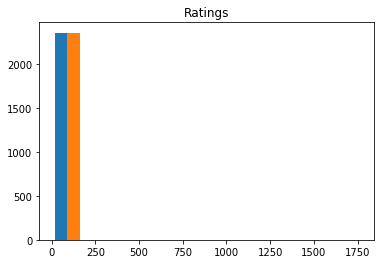

In [66]:
plt.hist([twitter_archive_copy["rating_numerator"], twitter_archive_copy["rating_denominator"]])
plt.title("Ratings")